# Topic: Cardio Vascular

Dataset taken from: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

---

## Problem Description:






## Table of Contents:
1.0 Importing Essential Libraries and Dataset   
1.1 Importing Essential Functions   
1.2 Describing the Variables

2.0 Plotting the different Variables   
2.1 Numerical Variable Analysis   
2.2 Categorical Variable Analysis



---


---
## 1.0 Importing Essential Libraries & Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
sb.set()

df = pd.read_excel("cardio_train.xlsx")
df = df.reset_index(drop=True)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72,135,80,1,2,0,0,0,1


In [3]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205543,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395829,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           70000 non-null  int64
 1   age          70000 non-null  int64
 2   gender       70000 non-null  int64
 3   height       70000 non-null  int64
 4   weight       70000 non-null  int64
 5   ap_hi        70000 non-null  int64
 6   ap_lo        70000 non-null  int64
 7   cholesterol  70000 non-null  int64
 8   gluc         70000 non-null  int64
 9   smoke        70000 non-null  int64
 10  alco         70000 non-null  int64
 11  active       70000 non-null  int64
 12  cardio       70000 non-null  int64
dtypes: int64(13)
memory usage: 6.9 MB


# 1.1 Importing essential functions: 
---

1. Linear Regression function
2. Goodness of Fit function
3. Remove of Outliers
4. Balanced Target function
 

In [5]:
def lr(X, y, df):
    
    
    X = pd.DataFrame(df[X])
    y = pd.DataFrame(df[y])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    model = LinearRegression()
    model.fit(X_train ,y_train)
    
    print('Intercept \t: b = ', model.intercept_)
    print('Coefficients \t: a = ', model.coef_)
    
    # Formula for the Regression line
    regline_x = X_train
    regline_y = model.intercept_ + model.coef_ * X_train
    
    # Predict Response corresponding to Predictors
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
   
    f, axes = plt.subplots(1, 2, figsize=(24, 12))

    axes[0].scatter(X_train, y_train, color = "blue")
    axes[0].plot(regline_x, regline_y, 'r-', linewidth = 3)
    axes[0].set_title("Regression for Training Set")
    
    axes[1].scatter(X_test, y_test, color = "green")
    axes[1].scatter(X_test, y_test_pred, color = "red")
    axes[1].set_title("Model Prediction for Testing Set")
    plt.show()

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", model.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", model.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()
    
# function to test goodness of fit using the Test Set
def gof_func(predictor, response):
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(
        predictor, response, test_size=0.20
    )

    # Linear Regression using Train Data
    linreg = LinearRegression()  # create the linear regression object
    linreg.fit(X_train, y_train)  # train the linear regression model

    # Predict SalePrice values corresponding to predictor
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Mean Squared Error (MSE)
    def mean_sq_err(actual, predicted):
        """Returns the Mean Squared Error of actual and predicted values"""
        return np.mean(np.square(np.array(actual) - np.array(predicted)))

    mse = mean_sq_err(y_test, y_test_pred)
    print("Mean Squared Error (MSE) \t:", mse)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
    
            
def remove_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    df_out = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]
    count = ( ((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr) ))).sum()
    print(count)
    return df_out

def balanced_target(target, dataset, hue=None):
    sb.set(style='darkgrid', palette='Accent')
    ax = sb.countplot(x=target, hue=hue, data=dataset)
    ax.figure.set_size_inches(10, 6)
    ax.set_title('Cardio Distribution', fontsize=18, loc='left')
    ax.set_xlabel(target, fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    ax=ax


# 1.2 Describing the Variables:
---

### Different Variables:

    1. Age - Numerical - Days
    2. Height - Numerical - Cm
    3. Weight - Numerical - Kg
    4. Gender - Categorical - 1/0
    5. Systolic Blood Pressure (ap_hi) - Numerical - mmHg
    6. Systolic Blood Pressure (ap_lo) - Numerical - mmHg
    7. Cholesterol - Categorical - 1-3
    8. Glucose - Categorical - 1-3
    9. Smoke - Categorical - 1/0
    10. Alcohol Intake - Categorical - 1/0
    11. Physical Activity - Categorical - 1/0
    12. Cardio - Categorical - 1/0

##  2.0 Plotting the different Variables:
---

First we will explore the Numerical Variables, then the Categorical Variables.

### 2.1 Numerical Variable Analysis

For Numerical Variables, we will use a boxplot and plot them against cardio (i.e the presence of cardio vascular disease)

Afterwhich, we will plot a histogram for each of the variables to check their skew.

<AxesSubplot:xlabel='cardio', ylabel='ap_lo'>

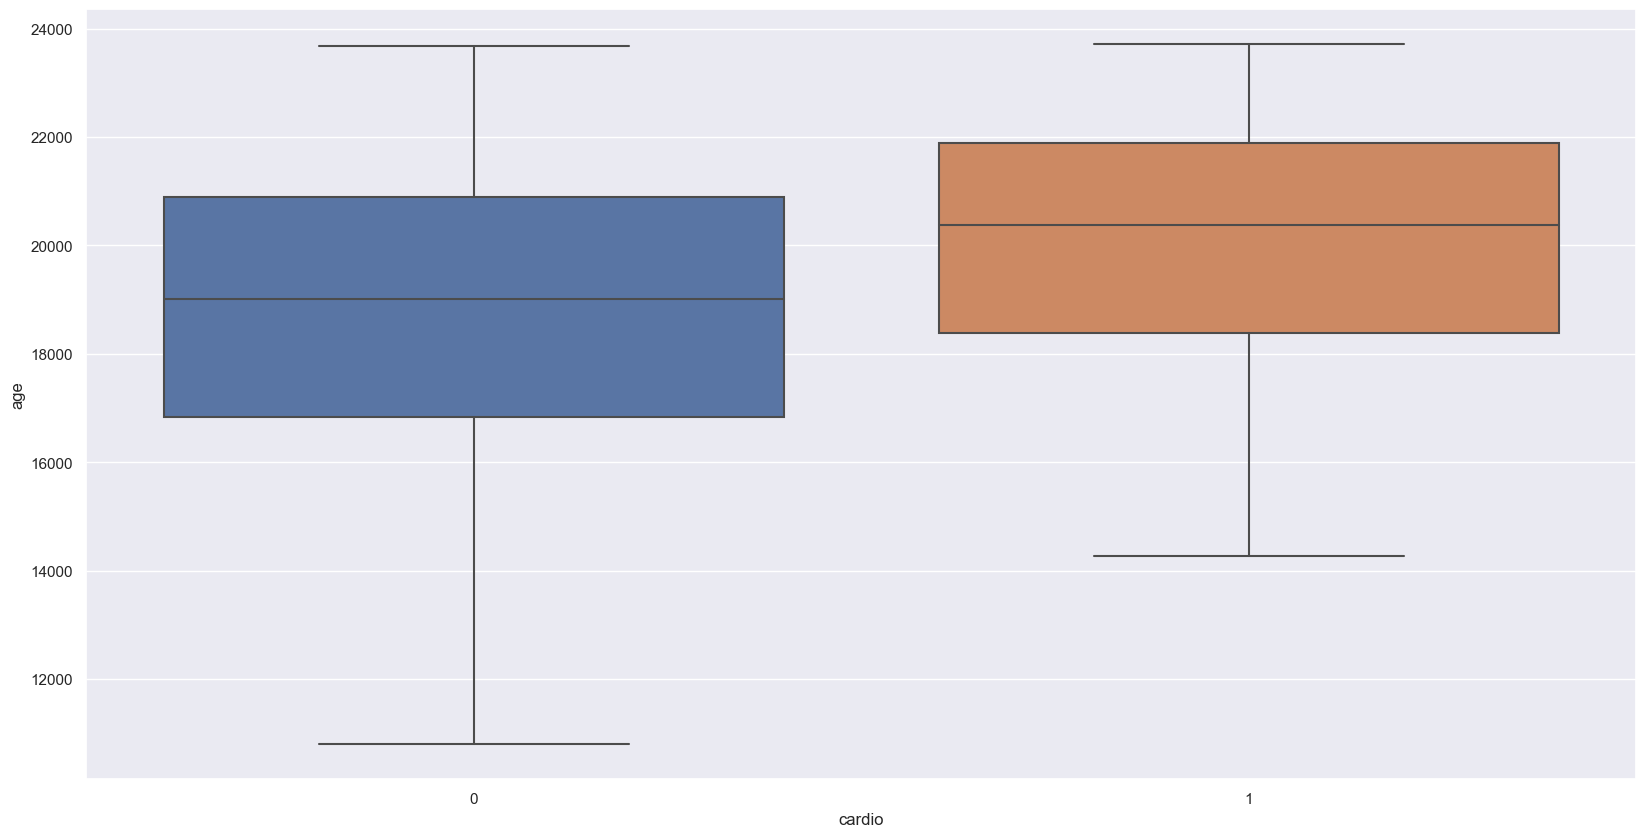

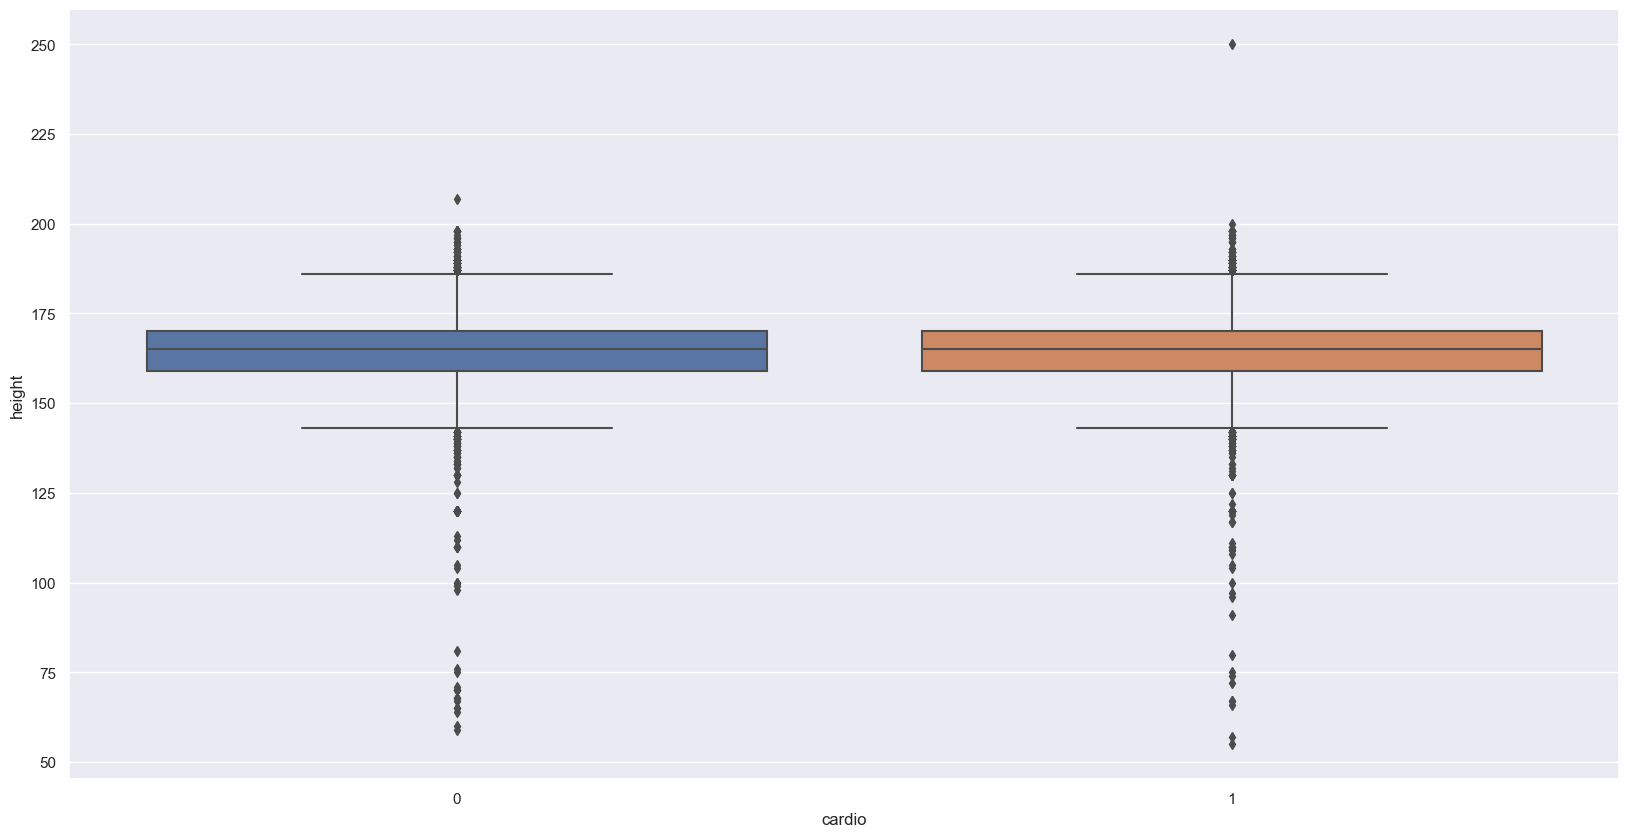

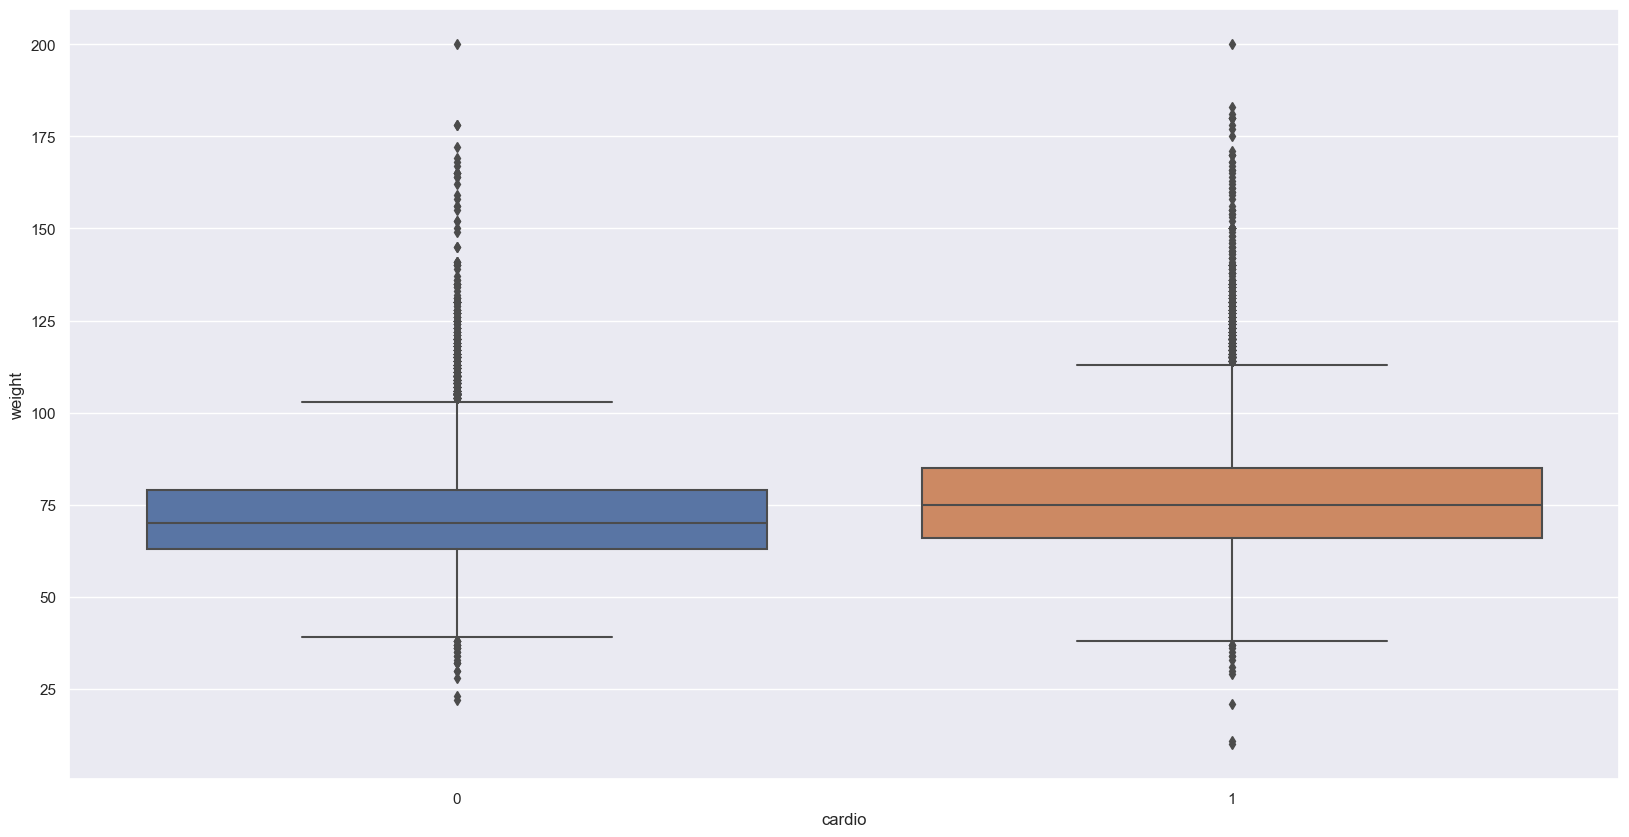

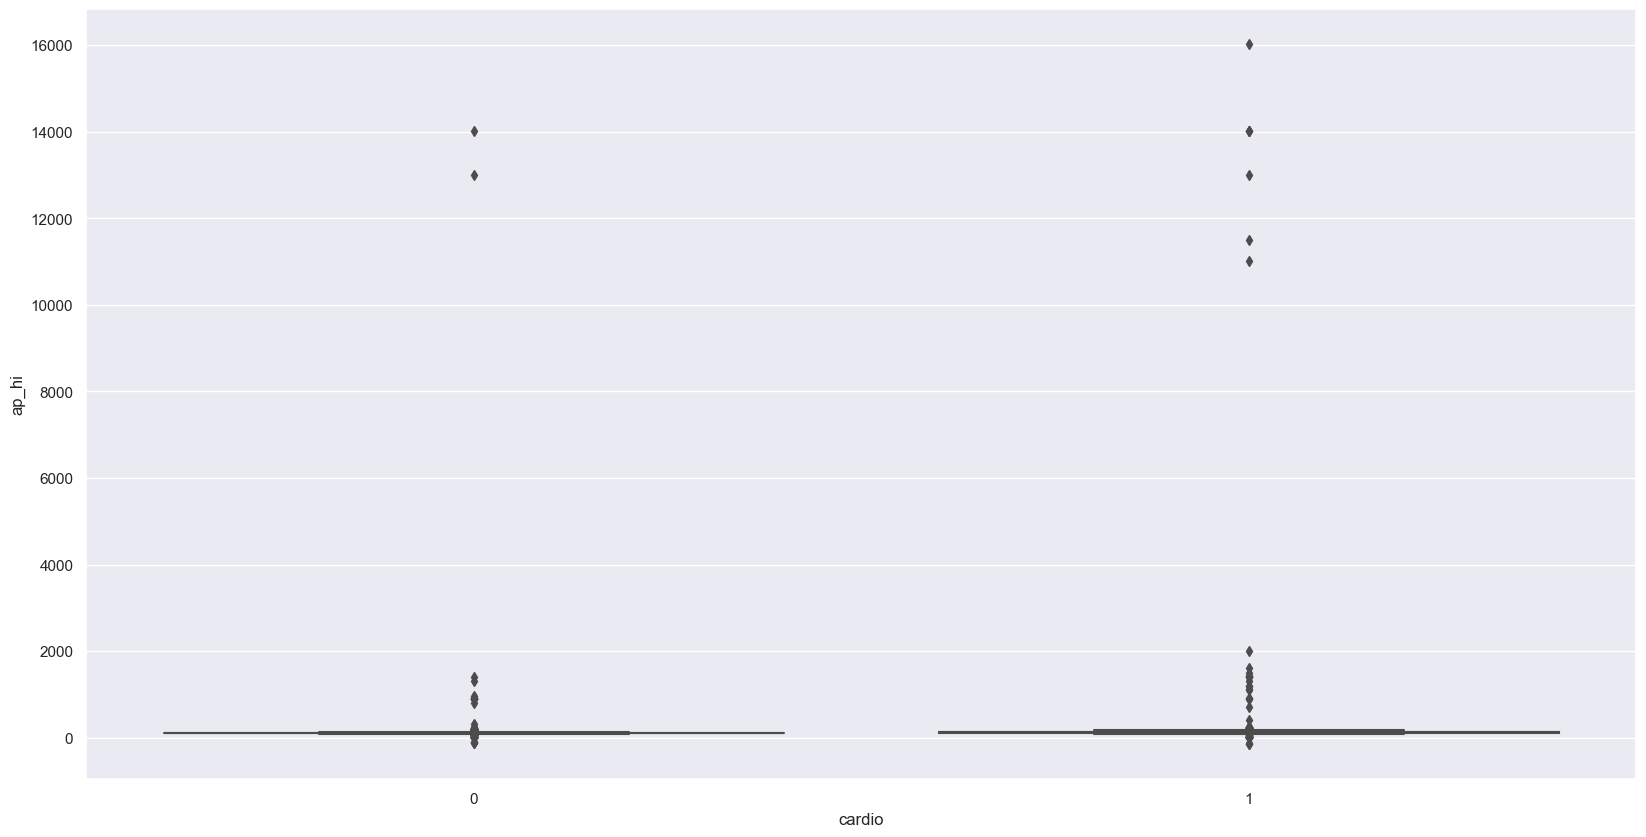

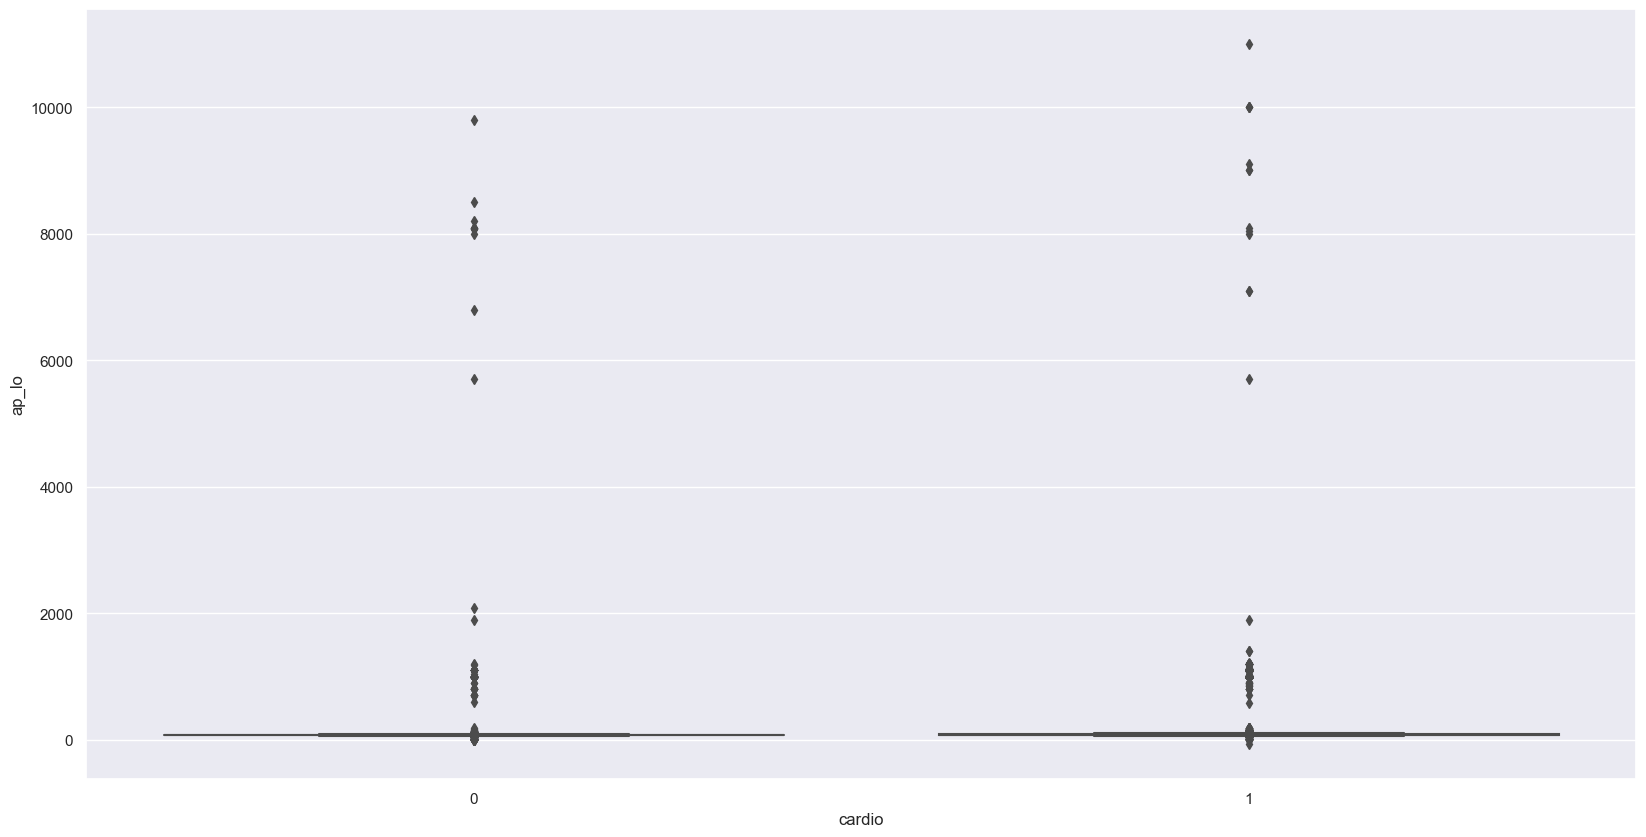

In [6]:
f = plt.figure(figsize=(20,10))
sb.boxplot(data=df, orient='v',x='cardio',y='age')
f = plt.figure(figsize=(20,10))
sb.boxplot(data=df, orient='v',x='cardio',y='height')
f = plt.figure(figsize=(20,10))
sb.boxplot(data=df, orient='v',x='cardio',y='weight')
f = plt.figure(figsize=(20,10))
sb.boxplot(data=df, orient='v',x='cardio',y='ap_hi')
f = plt.figure(figsize=(20,10))
sb.boxplot(data=df, orient='v',x='cardio',y='ap_lo')

<AxesSubplot:xlabel='ap_lo', ylabel='Count'>

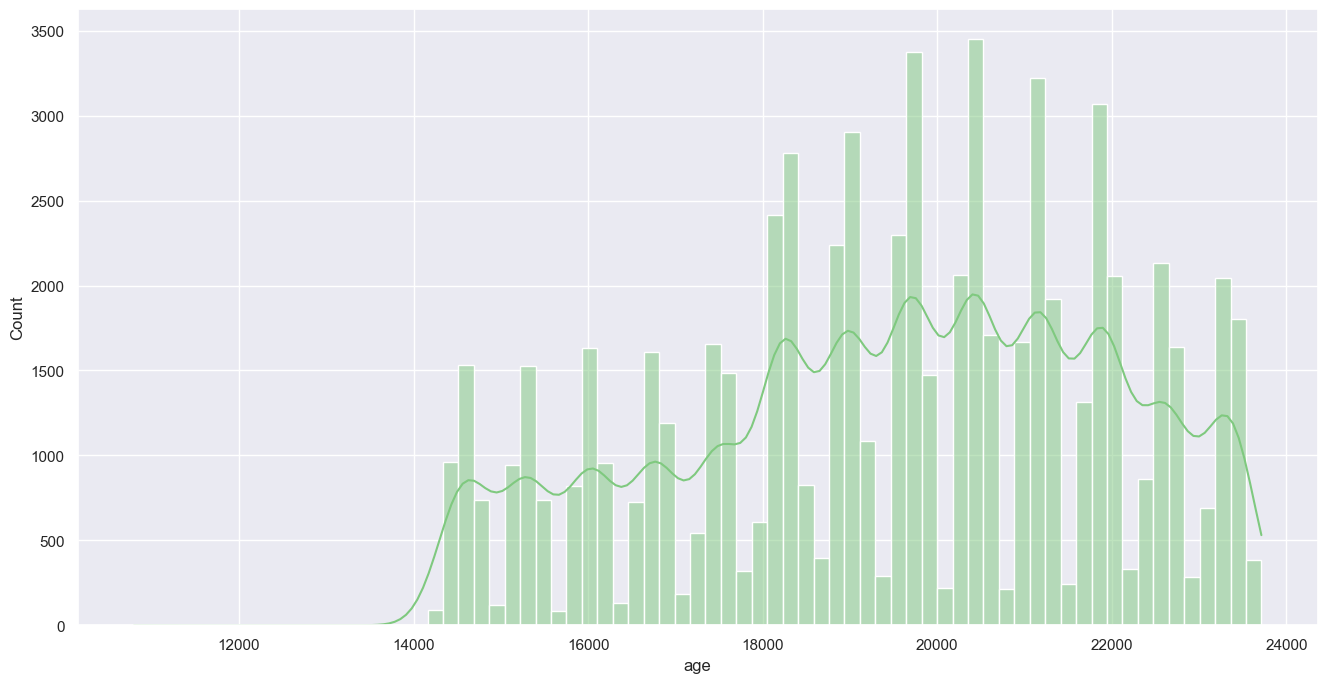

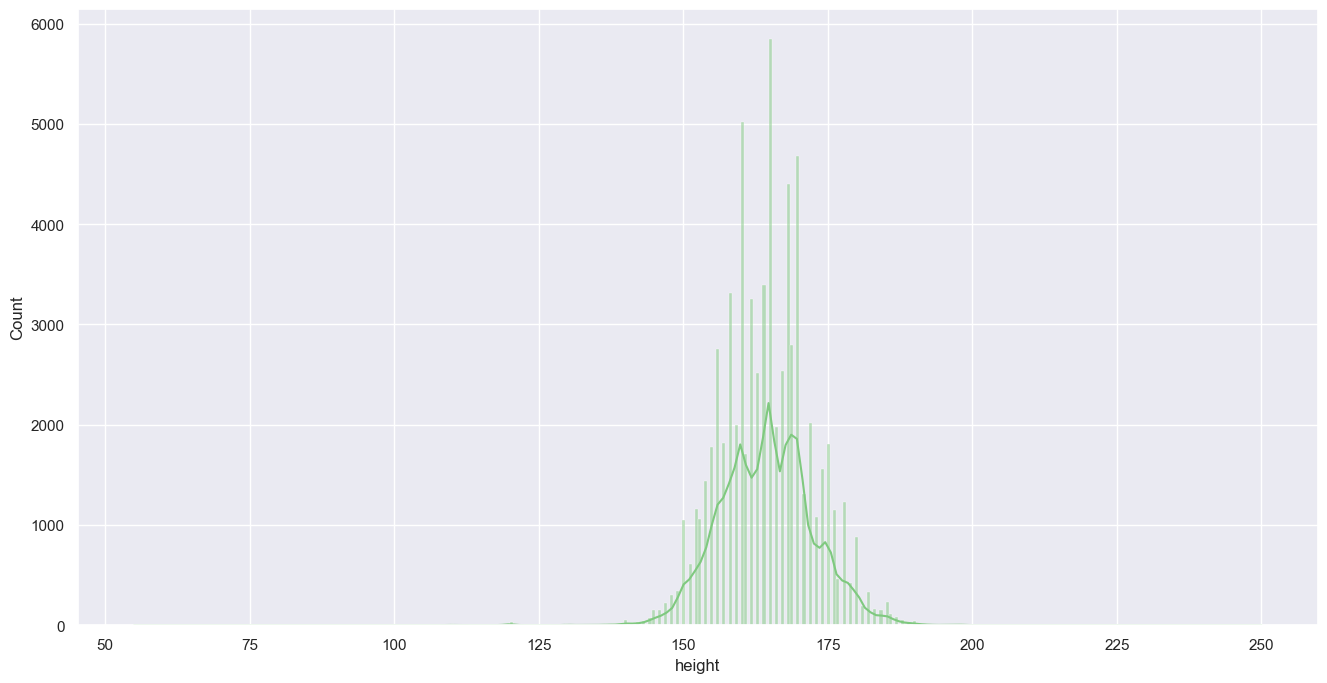

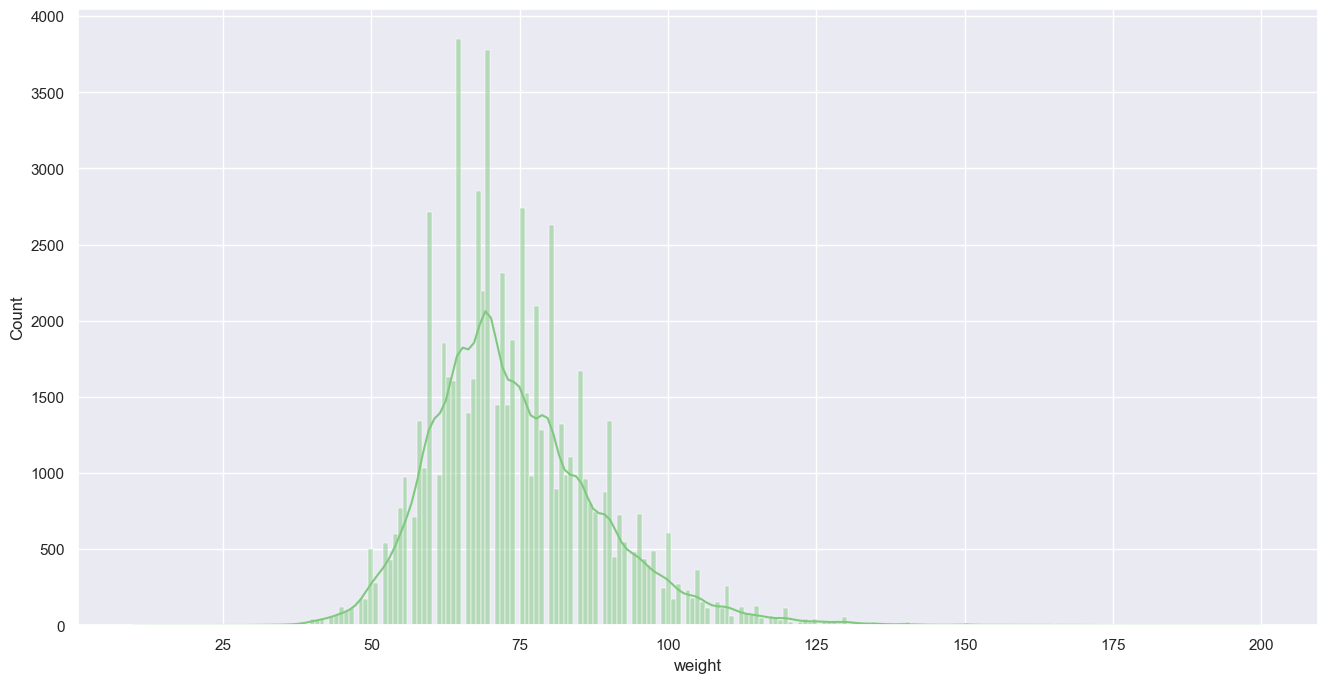

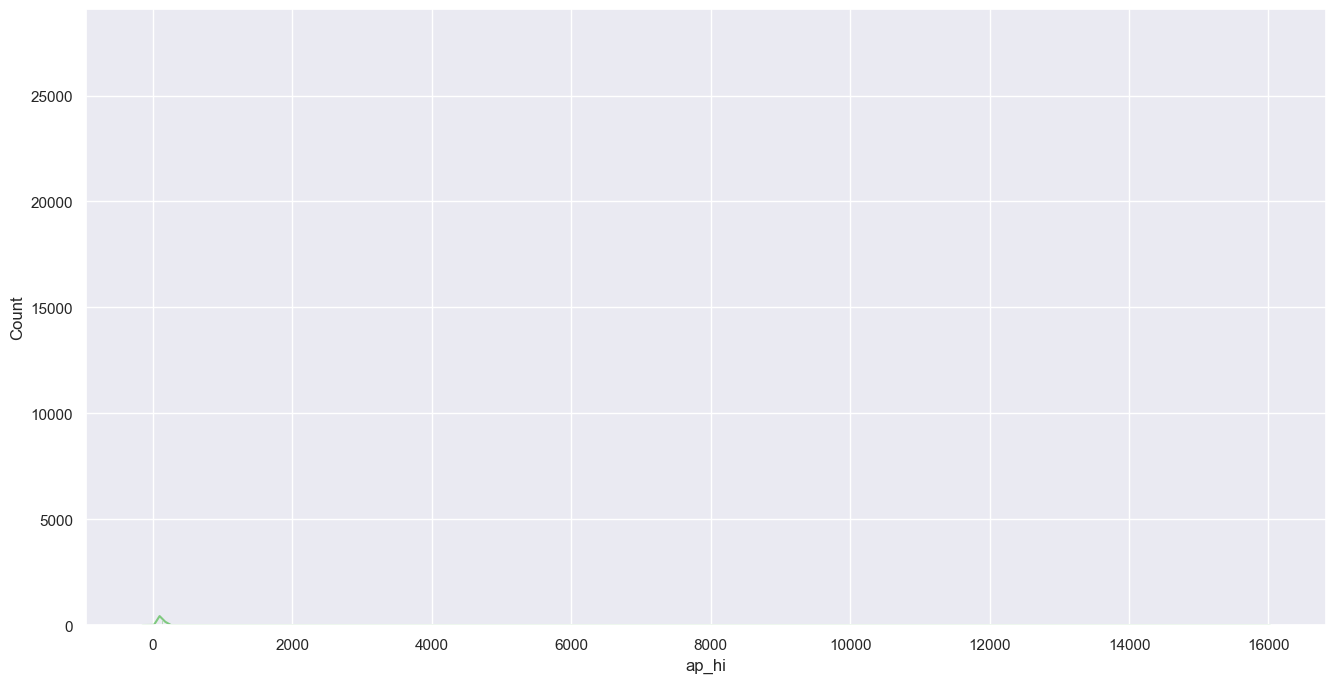

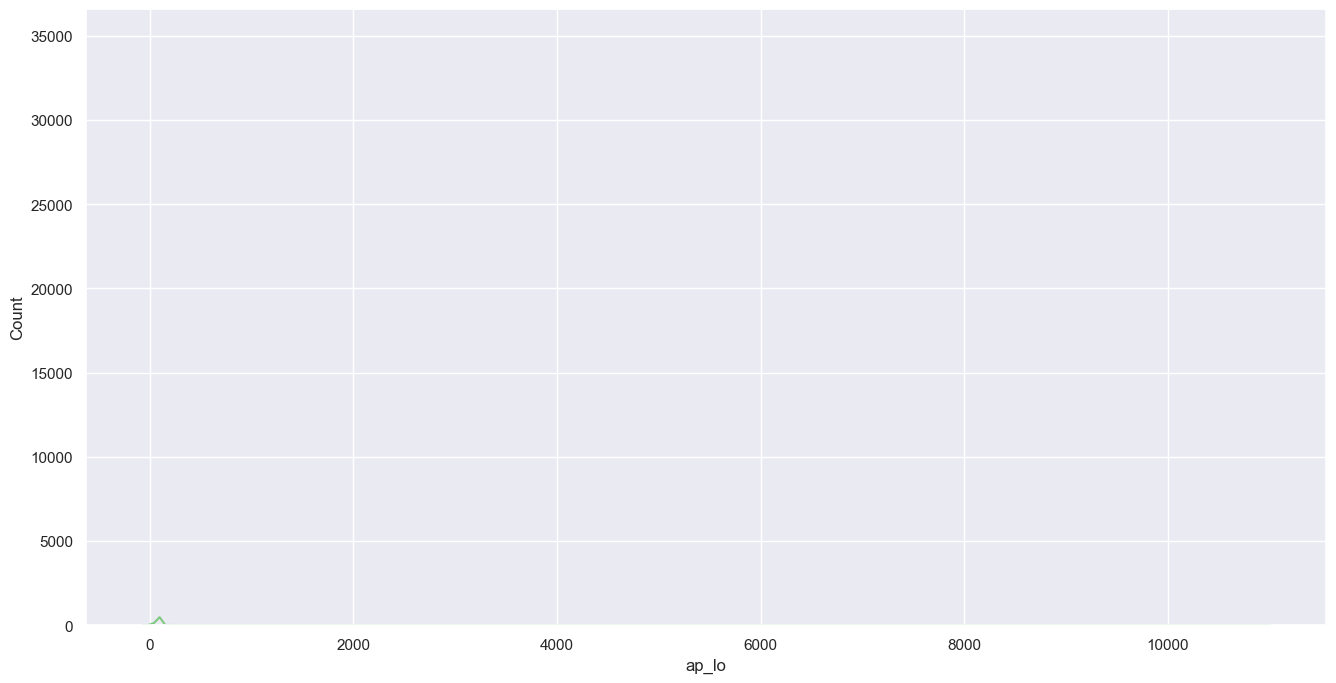

In [17]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = df["age"], kde=True)
f = plt.figure(figsize=(16, 8))
sb.histplot(data = df["height"], kde=True)
f = plt.figure(figsize=(16, 8))
sb.histplot(data = df["weight"], kde=True)
f = plt.figure(figsize=(16, 8))
sb.histplot(data = df["ap_hi"], kde=True)
f = plt.figure(figsize=(16, 8))
sb.histplot(data = df["ap_lo"], kde=True)

In [8]:
df[['age','height','weight','ap_hi','ap_lo']].skew(axis=0,skipna=True)

age       -0.307055
height    -0.642187
weight     1.012070
ap_hi     85.296214
ap_lo     32.114083
dtype: float64

From the data, LotArea is the most skewed from a regular normal distribution. With a high positive skew of 12.207688.

---

### Plotting Correlation & Heatmap

In [9]:
numvars=df[['age','height','weight','ap_hi','ap_lo']]
numvars.corr()

,age,height,weight,ap_hi,ap_lo
age,1.000000,-0.081515,0.053682,0.020764,0.017647
height,-0.081515,1.000000,0.290966,0.005488,0.006150
weight,0.053682,0.290966,1.000000,0.030702,0.043711
ap_hi,0.020764,0.005488,0.030702,1.000000,0.016086
ap_lo,0.017647,0.006150,0.043711,0.016086,1.000000


<AxesSubplot:>

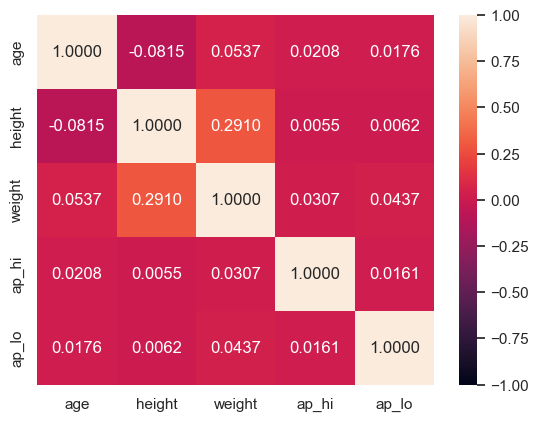

In [10]:
sb.heatmap(numvars.corr(),vmin=-1,vmax=1,annot=True,fmt=".4f")

---
### 2.2 Categorical Variable Analysis:

For Categorical Variables, we will use a heatmap and correlation matrix.

We will first put these categorical Variables into one seperate DataFrame so as to more easily compare and contrast with 'cardio'.

The 6 Categorical Variables we are exploring are:
1. Gender
2. Cholesterol
3. Glucose
4. Smoking
5. Alcohol Intake
6. Physical Activity

Total count of cardio = 0: 35021
Total count of cardio = 0: 34979


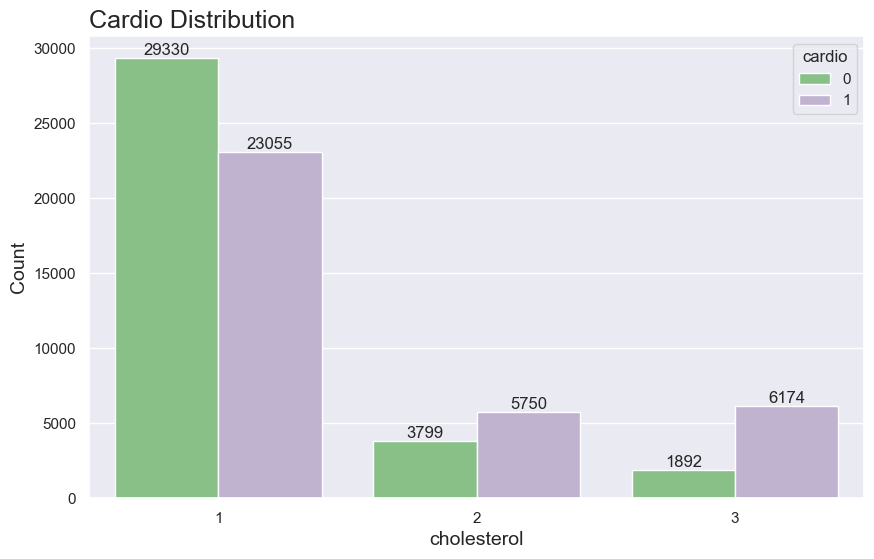

In [18]:
# cardio distribution by 'cholesterol' (Cholesterol)
balanced_target(target='cholesterol', hue='cardio', dataset=df)

total_cardio_0 = df['cardio'].value_counts()[0]
total_cardio_1 = df['cardio'].value_counts()[1]

print('Total count of cardio = 0:', total_cardio_0)
print('Total count of cardio = 0:', total_cardio_1)

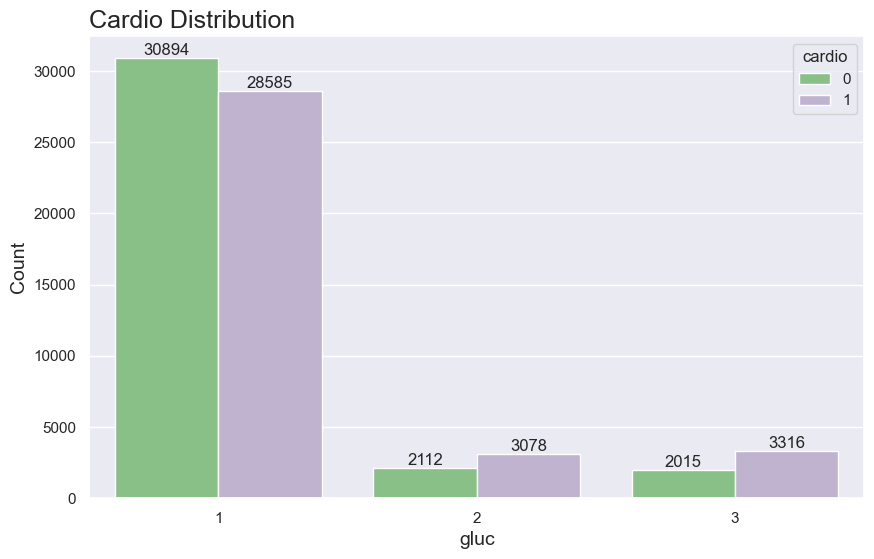

In [12]:
# cardio distribution by 'gluc' (Glucose)
balanced_target(target='gluc',hue='cardio', dataset=df)

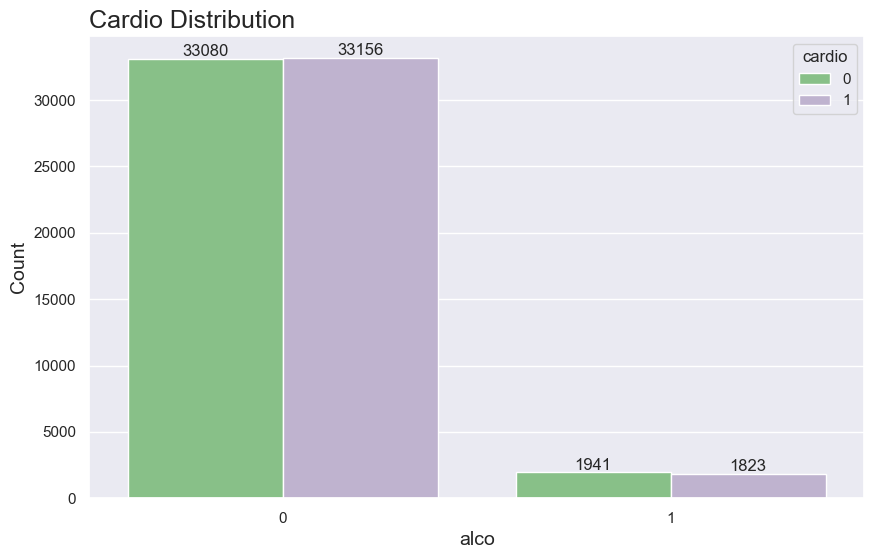

In [13]:
# cardio distribution by 'alco' (Alcohol)
balanced_target(target='alco',hue='cardio', dataset=df)

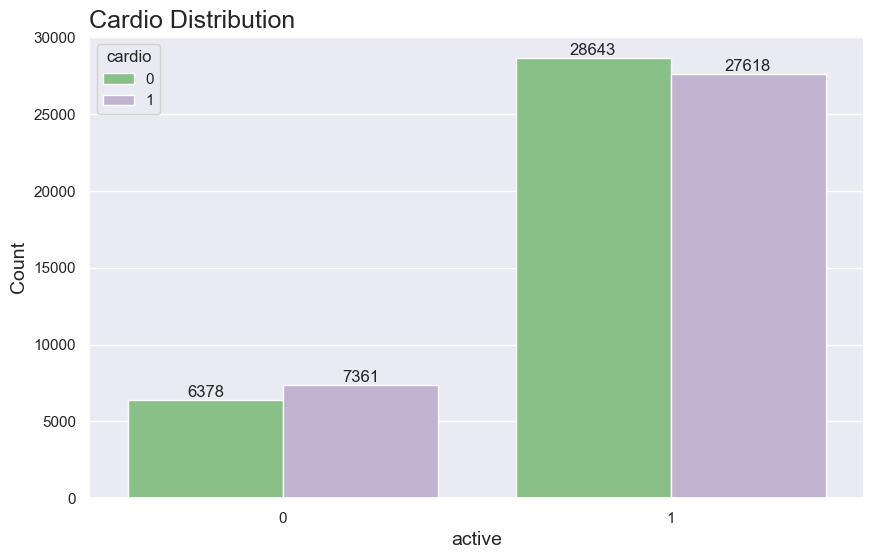

In [14]:
# cardio distribution by 'active' (Physical Activity)
balanced_target(target='active',hue='cardio', dataset=df)

## Exploratory Data Analysis Part I:
---

Cleaning the Data and removing outliers if necessary.


In [15]:
# Changing column names and variable description to make the data more readable

In [16]:
df_cleaned = df.copy()
df_cleaned.rename(columns = {'ap_hi': 'Systolic_BP'}, inplace = True)
df_cleaned.rename(columns = {'ap_lo': 'Diastolic_BP'}, inplace = True)
df_cleaned.rename(columns = {'gluc': 'Glucose'}, inplace = True)
df_cleaned.rename(columns = {'alco': 'Alcohol'}, inplace = True)
df_cleaned.rename(columns = {'cardio': 'Cardio_Patient'}, inplace = True)

# Dropping unneeded ID column
df_cleaned.drop("id", axis=1, inplace=True);

# Replacing data in columns for readibility
df_cleaned['gender'] = df_cleaned['gender'].replace(1, 'Male')
df_cleaned['gender'] = df_cleaned['gender'].replace(2, 'Female')
df_cleaned['cholesterol'] = df_cleaned['cholesterol'].replace(1, 'Normal')
df_cleaned['cholesterol'] = df_cleaned['cholesterol'].replace(2, 'Above_Normal')
df_cleaned['cholesterol'] = df_cleaned['cholesterol'].replace(3, 'Well_Above_Normal')
df_cleaned['Glucose'] = df_cleaned['Glucose'].replace(1, 'Normal')
df_cleaned['Glucose'] = df_cleaned['Glucose'].replace(2, 'Above_Normal')
df_cleaned['Glucose'] = df_cleaned['Glucose'].replace(3, 'Well_Above_Normal')
df_cleaned['smoke'] = df_cleaned['smoke'].replace(1, 'Yes')
df_cleaned['smoke'] = df_cleaned['smoke'].replace(0, 'No')
df_cleaned['Alcohol'] = df_cleaned['Alcohol'].replace(1, 'Yes')
df_cleaned['Alcohol'] = df_cleaned['Alcohol'].replace(0, 'No')
df_cleaned['active'] = df_cleaned['active'].replace(1, 'Yes')
df_cleaned['active'] = df_cleaned['active'].replace(0, 'No')
df_cleaned['Cardio_Patient'] = df_cleaned['Cardio_Patient'].replace(1, 'Yes')
df_cleaned['Cardio_Patient'] = df_cleaned['Cardio_Patient'].replace(0, 'No')

# Set all columns to upper case
df_cleaned.columns = df_cleaned.columns.str.upper()
df_cleaned

,AGE,GENDER,HEIGHT,WEIGHT,SYSTOLIC_BP,DIASTOLIC_BP,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,ACTIVE,CARDIO_PATIENT
0,18393,Female,168,62,110,80,Normal,Normal,No,No,Yes,No
1,20228,Male,156,85,140,90,Well_Above_Normal,Normal,No,No,Yes,Yes
2,18857,Male,165,64,130,70,Well_Above_Normal,Normal,No,No,No,Yes
3,17623,Female,169,82,150,100,Normal,Normal,No,No,Yes,Yes
4,17474,Male,156,56,100,60,Normal,Normal,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,Female,168,76,120,80,Normal,Normal,Yes,No,Yes,No
69996,22601,Male,158,126,140,90,Above_Normal,Above_Normal,No,No,Yes,Yes
69997,19066,Female,183,105,180,90,Well_Above_Normal,Normal,No,Yes,No,Yes
69998,22431,Male,163,72,135,80,Normal,Above_Normal,No,No,No,Yes


### Cleaned Variable Description:

Format: Column Description (COLUMN NAME):

    1. Age (AGE) - Numerical - Days
    2. Height (HEIGHT) - Numerical - Cm
    3. Weight (WEIGHT) - Numerical - Kg
    4. Gender (GENDER) - Categorical - Male/Female
    5. Systolic Blood Pressure (SYSTOLIC_BP) - Numerical - mmHg
    6. Diastolic Blood Pressure (DIASTOLIC_BP) - Numerical - mmHg
    7. Cholesterol (CHOLESTEROL) - Categorical - Normal/Above_Normal/Well_Above_Normal
    8. Glucose (GLOCOSE) - Categorical - Normal/Above_Normal/Well_Above_Normal
    9. Smoking (SMOKE) - Categorical - Yes/No
    10. Alcohol Intake (ALCOHOL) - Categorical - Yes/No
    11. Physical Activity (ACTIVE) - Categorical - Yes/No
    12. Patient of Cardio Disease (CARDIO_PATIENT) - Categorical - Yes/No